<a href="https://colab.research.google.com/github/jermwatt/machine_learning_refined/blob/main/notes/3_First_order_methods/3_1_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 3: First order methods

# Introduction

In [ ]:
# import standard libs
import os

# if on collab pull required subdirectories
if os.getenv("COLAB_RELEASE_TAG"): 
    # install github clone - allows for easy cloning of subdirectories
    !pip install github-clone
    from pathlib import Path 

    # clone images
    if not Path('chapter_3_images').is_dir():
        !ghclone https://github.com/jermwatt/machine_learning_refined/tree/main/notes/3_First_order_methods/chapter_3_images
    else:
        print('chapter_3_images already cloned!')

# append path for local library, data, and image import
import sys
sys.path.append('./chapter_3_images') 

# image paths
image_path_1 = 'chapter_3_images/Fig_2_7.png'

# standard imports
from IPython.display import Image, HTML

In the previous Chapter we introduced zero order optimization methods - including global and local optimization schemes.  The latter methods were by far the most promising, where we repeatedly refined an initial sample input by traveling in *descent directions*, i.e., directions in the input space that lead to points lower and lower on the function.  There we described zero-order methods for finding such descent directions at each step.  These consist of various brute-force search approaches that are either prohibitively expensive to employ for functions of even moderately large input dimension (e.g., random search) or are severely restricted in terms of the quality of descent directions they can find (e.g., coordinate search).

In this Chapter we mirror the structure of our discussion in the previous Chapter in describing *first order optimization methods*.  We begin with a discussion of the *first order optimality condition* - which codifies how the first derivative(s) of a function characterize its minima.  Then we discuss some fundamental concepts related to the geometric nature of (tangent) hyperplanes and in particular the first order Taylor series in preparation for discussing the *gradient descent algorithm*, a hugely popular first order local optimization algorithm.  As we will see, by exploiting a function's first order information we can construct a first order local optimization method that naturally determines high quality descent directions at a cost that is cheaper than even the coordinate search approach described in the last Chapter.  

With these ideas in hand we can then formally detail the gradient descent algorithm, examining a number of examples that help exhibit the algorithm's general behavior.  As with any local optimization method, here we must too worry about the selection of the steplength parameter.  However because we will now be leveraging first order derivative(s) in constructing each descent direction we can say much more - mathematically speaking - about how to rigorously set the steplength parameter for gradient descent.  Finally we will also discuss first order coordinate approaches, which among other things allow us to make more direct use of the first order optimality conditions themselves.

## Big picture view of the gradient descent algorithm

As we saw previously, a local optimization method is one where we aim to find minima of a given function by beginning at some point $\mathbf{w}^0$ and taking number of steps $\mathbf{w}^1, \mathbf{w}^2, \mathbf{w}^3,...,\mathbf{w}^{K}$ of the generic form 

\begin{equation}
\mathbf{w}^{\,k} = \mathbf{w}^{\,k-1} + \alpha \mathbf{d}^{\,k}.
\end{equation}

where $\mathbf{d}^{\,k}$ are direction vectors (which ideally are *descent directions* that lead us to lower and lower parts of a function) and $\alpha$ is called the *steplength* parameter.  We saw how the random / coordinate search algorithms follows this framework precisely, the only difference between the two being how a descent direction is found at each step.  This idea - how a descent direction is found / computed - is what distinguishes any two local methods from one another.  One of the ultimate aims of this Chapter is to introduce the *gradient descent algorithm*, which is a *first order* local optimization method as it employs a function's first derivative(s) to cheaply compute a high quality descent direction.  

Here is how the gradient descent algorithm works at a high level (we will see complete details in the Chapter itself).  The first derivative of a function helps form the best *linear* approximation to the function locally (called the *first order Taylor series approximation*).  Because this approximation matches the function locally - and because it is extremely easy to compute the descent direction of a line or hyperplane regardless of its dimension (as we will see in this Chapter) - the descent direction of the tangent hyperplane is also a descent direction for the function itself.  If we simply steal this descent direction at each step and employ it in a local optimization framework we have created the *gradient descent algorithm*.

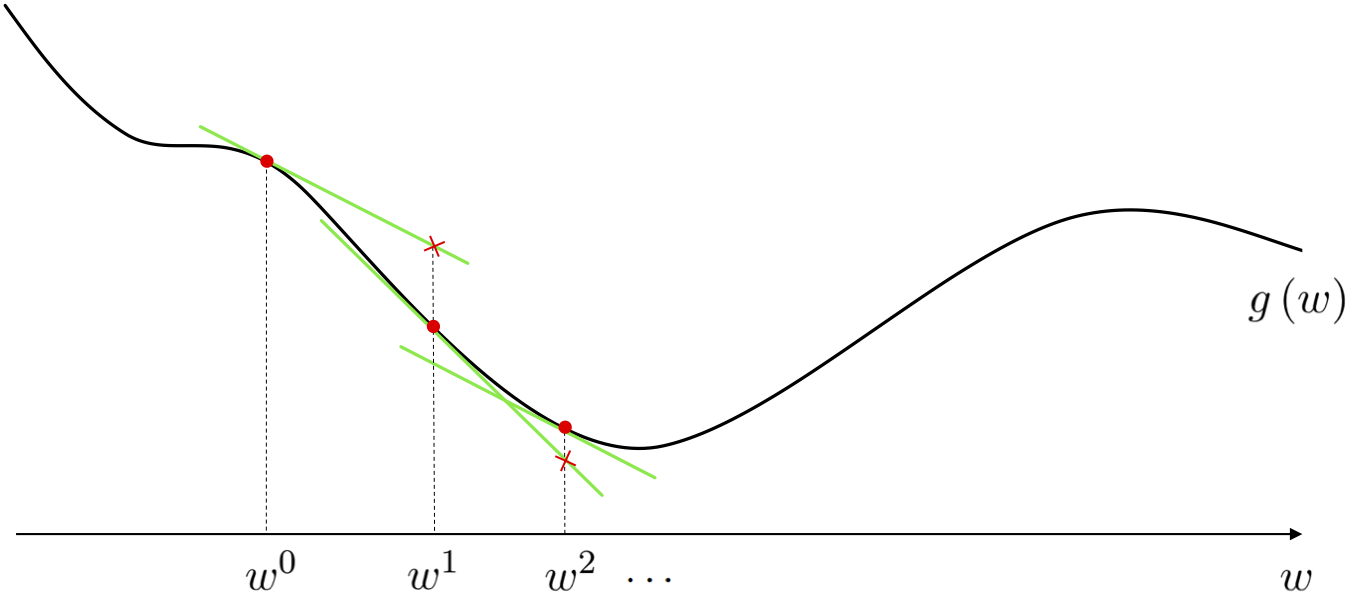

In [3]:
Image(image_path_1, width=600)

<figure>
<figcaption>   
<strong>Figure 1:</strong> <em> A figurative drawing of the gradient descent algorithm.  The first order Taylor series approximation provides an excellent and easily computed descent direction at each step of this local method of optimization (here a number of approximations are shown in green).   Employing these directions at each step the *gradient descent algorithm* can be used to properly minimize generic functions.  Moreover, unlike the zero-order local search algorithms, gradient descent scales very well with input dimension since the descent direction of a hyperplane is much more easily computed in high dimensions than any search approach.
</em>  </figcaption> 
</figure>